In [1]:
# First: read the geotiff image with GDAL.
from osgeo import gdal, osr

gdal.UseExceptions()


fname = '/notebooks/resources/T22KHG_20190425T132241_TCI_smaller.tif'

ds = gdal.Open(fname)
data = ds.ReadAsArray()
gt = ds.GetGeoTransform()
proj = ds.GetProjection()

inproj = osr.SpatialReference()
inproj.ImportFromWkt(proj)

print('\n\n## ds ##:\n\n' + str(ds))
print('\n\n## data ##:\n\n' + str(data))
print('\n\n## gt ##:\n\n' + str(gt))
print('\n\n## proj ##:\n\n' + str(proj))
print('\n\n## inproj ##:\n\n' + str(inproj))



## ds ##:

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f3d8c5cc510> >


## data ##:

[[[28 28 28 ... 29 28 28]
  [27 29 29 ... 28 28 29]
  [29 32 31 ... 31 32 35]
  ...
  [47 47 46 ... 35 34 34]
  [46 46 48 ... 33 33 35]
  [46 46 48 ... 33 34 35]]

 [[46 47 50 ... 51 51 51]
  [46 47 49 ... 51 52 51]
  [48 50 52 ... 51 52 53]
  ...
  [58 57 57 ... 58 57 57]
  [57 57 57 ... 57 57 58]
  [58 57 57 ... 57 58 58]]

 [[53 54 54 ... 55 56 55]
  [54 55 55 ... 56 55 55]
  [55 57 57 ... 55 55 57]
  ...
  [62 61 61 ... 59 59 59]
  [61 61 61 ... 59 58 59]
  [62 61 60 ... 59 58 58]]]


## gt ##:

(885110.0, 10.0, 0.0, 8176910.0, 0.0, -10.0)


## proj ##:

PROJCS["WGS 84 / UTM zone 22S",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Me

In [2]:
# Second: convert the WKT projection information to a cartopy projection.
import cartopy.crs as ccrs

projcs = inproj.GetAuthorityCode('PROJCS')
print('\n\n## projcs ##:\n\n' + str(projcs))

projection = ccrs.epsg(projcs)
print('\n\n## projection ##:\n\n' + str(projection))



## projcs ##:

32722


## projection ##:

_EPSGProjection(32722)


In [21]:
# data[3:3, :, :].shape
data[3:3, :, :]

array([], shape=(0, 1688, 2452), dtype=uint8)



## gt ##:

(885110.0, 10.0, 0.0, 8176910.0, 0.0, -10.0)


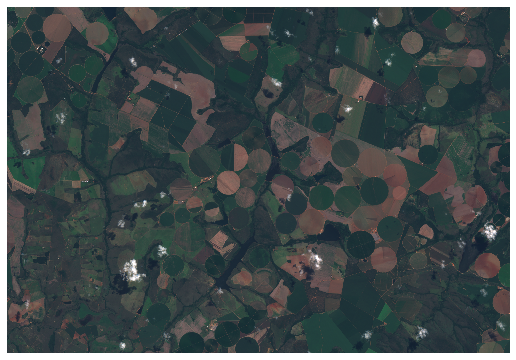

In [24]:
# Third (and last): the figure.
import matplotlib.pyplot as plt
%matplotlib inline

subplot_kw = dict(projection=projection)
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=subplot_kw)

extent = (gt[0], gt[0] + ds.RasterXSize * gt[1],
          gt[3] + ds.RasterYSize * gt[5], gt[3])

img = ax.imshow(data[:3, :, :].transpose((1, 2, 0)), extent=extent, origin='upper')

print('\n\n## gt ##:\n\n' + str(gt))

In [23]:
import inspect

for i in inspect.getmembers(ds):
    # Ignores anything starting with underscore 
    # (that is, private and protected attributes)
    if not i[0].startswith('_'):
        # Ignores methods
        if not inspect.ismethod(i[1]):
            print(i)
print('\n')
# dir(ds)

('RasterCount', 3)
('RasterXSize', 2452)
('RasterYSize', 1688)
('this', <Swig Object of type 'GDALDatasetShadow *' at 0x7f3d8c5cc510>)




In [ ]:
# # First: read the geotiff image with GDAL.
# from osgeo import gdal, osr

# gdal.UseExceptions()


# fname = '/notebooks/resources/T22KHG_20190425T132241_TCI_smaller.tif'

# ds = gdal.Open(fname)
# data = ds.ReadAsArray()
# gt = ds.GetGeoTransform()
# proj = ds.GetProjection()

# inproj = osr.SpatialReference()
# inproj.ImportFromWkt(proj)

# print(inproj)

# # Second: convert the WKT projection information to a cartopy projection.
# import cartopy.crs as ccrs



# projcs = inproj.GetAuthorityCode('PROJCS')
# print(projcs)
# projection = ccrs.epsg(projcs)
# print(projection)

# # Third (and last): the figure.
# import matplotlib.pyplot as plt
# %matplotlib inline

# subplot_kw = dict(projection=projection)
# fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=subplot_kw)

# extent = (gt[0], gt[0] + ds.RasterXSize * gt[1],
#           gt[3] + ds.RasterYSize * gt[5], gt[3])

# img = ax.imshow(data[:3, :, :].transpose((1, 2, 0)), extent=extent, origin='upper')